In [1]:
import gym
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
env = gym.make('CliffWalking-v0')
obs = env.reset()

In [3]:
def LearnCliffWalking(algorithm = 'SARSA'): # Algorithm = <any thing else> does Q Learning
    

    alpha = 0.2
    epsilon = 0.3
    discount = 0.9
    total_episodes = 600
    total_repetition = 100

    all_rewards = []
    all_policies = []

    # To find the average performance
    for repeats in range(total_repetition):

        Q_sa = {}

        for s in range(48):
            for a in range(4):
                Q_sa[(s, a)] = 10
                
        pi_s = {}
        episode_reward = []


        for episode in range(total_episodes):
                
            state = env.reset()
            done = False

            total_reward = 0

            if state not in pi_s:
                action = np.random.randint(0, 4)
                pi_s[state] = action

            else:
                if np.random.rand() < epsilon:
                    action = np.random.randint(0, 4)
                else:
                    action = pi_s[state]
                    
            while not done:

                new_state, reward, done, info = env.step(action)

                total_reward += reward

                if algorithm == 'SARSA':

                    if new_state not in pi_s:
                        new_action = np.random.randint(0, 4)
                        pi_s[new_state] = new_action

                    else:
                        if np.random.rand() < epsilon:
                            new_action = np.random.randint(0, 4)
                        else:
                            new_action = pi_s[new_state]

                else: # Q Learning

                    if new_state not in pi_s:
                        new_action = np.random.randint(0, 4)
                        pi_s[new_state] = new_action
                    else:
                        new_action = pi_s[new_state]
                    
                Q_sa[(state, action)] = Q_sa[(state, action)] + alpha * (reward + discount * Q_sa[(new_state, new_action)] - Q_sa[(state, action)])

                pi_s[state] = np.argmax([Q_sa[state, 0], Q_sa[state, 1], Q_sa[state, 2], Q_sa[state, 3]])

                if algorithm != 'SARSA':
                    if new_state not in pi_s:
                        new_action = np.random.randint(0, 4)
                        pi_s[new_state] = new_action

                    else:
                        if np.random.rand() < epsilon:
                            new_action = np.random.randint(0, 4)
                        else:
                            new_action = pi_s[new_state]


                state = new_state
                action = new_action
            
            epsilon -= 1e-300
            episode_reward.append(total_reward)
        
        all_rewards.append(episode_reward)
        all_policies.append(pi_s)
    
    return all_rewards, all_policies

In [4]:
sarsa_rewards, sarsa_policies = LearnCliffWalking(algorithm = 'SARSA')
qlearning_rewards, qlearning_policies = LearnCliffWalking(algorithm = 'Q Learning')

In [5]:
np.mean(qlearning_rewards, 0).shape

(600,)

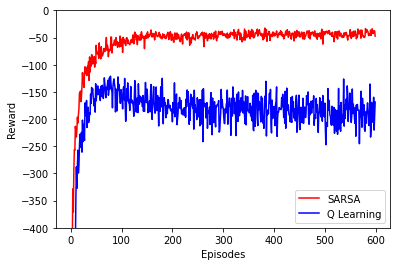

In [6]:
plt.plot(np.mean(sarsa_rewards, 0), 'r-')
plt.plot(np.mean(qlearning_rewards, 0), 'b-')
plt.ylim(-400, 0)

plt.legend(['SARSA', 'Q Learning'])
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.show()

In [7]:
final_policy = []
for state in range(48):
    state_action = []
    for policy in sarsa_policies:
        if state in policy:
            state_action.append(policy[state])
        else:
            state_action.append(9)
    final_policy.append(np.bincount(state_action).argmax())


print('Policy learnt via SARSA')
arrows = ['↑', '→', '↓', '←']
# arrows = ['U', 'R', 'D', 'L']

s = 0

for r in range(4):
    for c in range(12):
        if final_policy[s] != 9:
            print(arrows[final_policy[s]], end = " ")
        else:
            print('X', end = " ")
        s += 1
    
    print()
    


Policy learnt via SARSA
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → ↓ 
↑ X X X X X X X X X X ↑ 


In [8]:
final_policy = []
for state in range(48):
    state_action = []
    for policy in qlearning_policies:
        if state in policy:
            state_action.append(policy[state])
        else:
            state_action.append(9)
    final_policy.append(np.bincount(state_action).argmax())

print('Policy learnt via Q Learning')
arrows = ['↑', '→', '↓', '←']
# arrows = ['U', 'R', 'D', 'L']

s = 0

for r in range(4):
    for c in range(12):
        if final_policy[s] != 9:
            print(arrows[final_policy[s]], end = " ")
        else:
            print('X', end = " ")
        s += 1
    
    print()
    


Policy learnt via Q Learning
→ → → → → → → → → → → ↓ 
→ → → → → → → → → ↓ → ↓ 
→ → → → → → → → → → → ↓ 
↑ X X X X X X X X X X ↓ 
